In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.set(font_scale=1)
sns.set_style('darkgrid')
sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})

In [12]:
data = pd.read_csv('word_order.csv')

In [13]:
data = data[data['disrepancy'] != 1]
data = data[data['enough information'].notna()]

In [14]:
data.loc[data['ChatGPT target'] == 'Not enough information\r\n'] = 'Not enough information'
data.loc[data['enough information'] == 0.0, 'target'] = 'Not enough information'

In [15]:
conf_matrix = confusion_matrix(data['target'], data['ChatGPT target'])

In [16]:
data['target'].value_counts()

Not enough information    372
SOV                       106
No dominant order          22
SVO                        13
Name: target, dtype: int64

[]

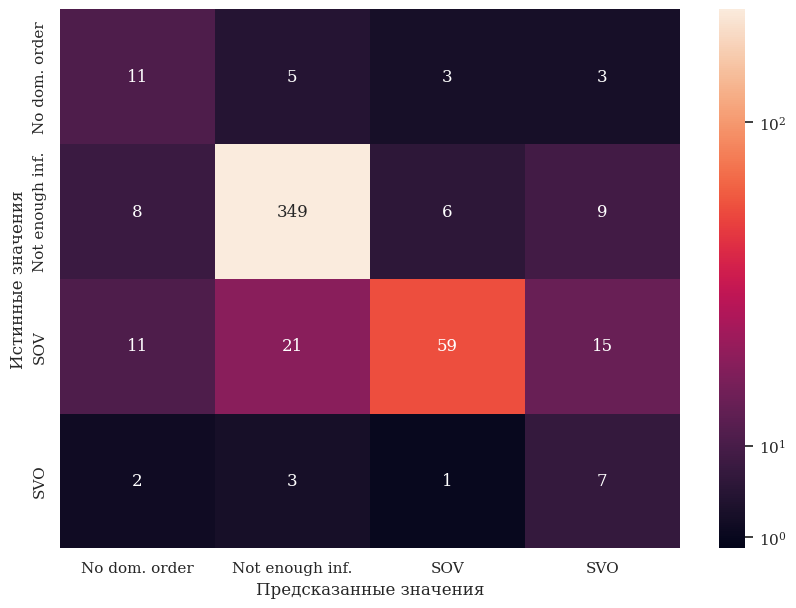

In [20]:
from matplotlib.colors import AsinhNorm
from matplotlib.ticker import MaxNLocator

labels = ['No dom. order', 'Not enough inf.', 'SOV', 'SVO']
ax=plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, norm=AsinhNorm(clip=True, vmin=0, vmax=200, linear_width=15), cbar_kws={'ticks': [1,10,100]});

# labels, title and ticks
ax.set_xlabel('Предсказанные значения');
ax.set_ylabel('Истинные значения'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)

In [9]:
from sklearn.metrics import classification_report

In [10]:
print(classification_report(data['target'], data['ChatGPT target']))

                        precision    recall  f1-score   support

     No dominant order       0.34      0.50      0.41        22
Not enough information       0.92      0.94      0.93       372
                   SOV       0.86      0.56      0.67       106
                   SVO       0.21      0.54      0.30        13

              accuracy                           0.83       513
             macro avg       0.58      0.63      0.58       513
          weighted avg       0.87      0.83      0.84       513

